### Assignment No. 01

### Name: Hira Arif

### Email: hiraarif077@gmail.com

In [67]:
%pip install pandas 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\home\appdata\local\programs\python\python312\lib\site-packages (2.2.2)



In [84]:
%pip install numpy

In [83]:
import pandas as pd
import numpy as np

# Problem 01: “Advanced Pandas Data Manipulation with Kaggle Housing Dataset” 


#### A.Load the Kaggle housing dataset.

In [69]:
Housing_Dataset=pd.read_csv("Housing.csv")
Housing_Dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### B. Filter houses priced above the median and those with more than 2 bedrooms and 2000 sqft living 
area. 

In [70]:
Housing_Dataset["price"].median()


np.float64(4340000.0)

In [71]:
Housing_Dataset["bedrooms"]>2

0       True
1       True
2       True
3       True
4       True
       ...  
540    False
541     True
542    False
543     True
544     True
Name: bedrooms, Length: 545, dtype: bool

In [72]:
Housing_Dataset["area"]>2000

0      True
1      True
2      True
3      True
4      True
       ... 
540    True
541    True
542    True
543    True
544    True
Name: area, Length: 545, dtype: bool

In [73]:
Filtered_Dataset=Housing_Dataset[(Housing_Dataset["price"]>4340000)&(Housing_Dataset["bedrooms"]>2)&(Housing_Dataset["area"]>2000)]
Filtered_Dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4403000,2880,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4403000,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4403000,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4382000,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished


#### c. Group by bedrooms and calculate the average price and median living area. 


In [74]:
Grouped_data=Housing_Dataset.groupby("bedrooms").agg(avg_price=("price","mean"),median_area=("area","median"))
Grouped_data

,avg_price,median_area
bedrooms,,
1,2.712500e+06,3710.0
2,3.632022e+06,4036.0
3,4.954598e+06,4830.0
4,5.729758e+06,5400.0
5,5.819800e+06,5350.0
6,4.791500e+06,3950.0


#### D. Sort by price and rank the top 5% most expensive houses.

In [75]:
Sorting_Dataset= Housing_Dataset.sort_values(by="price")
Sorting_Dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [76]:
threshold_index=int(len(Sorting_Dataset)*0.05)
threshold_price=Sorting_Dataset.iloc[threshold_index-1]["price"]
top_5_percent=Sorting_Dataset[Sorting_Dataset["price"]>=threshold_price]
top_5_percent

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
515,2450000,3210,3,1,2,yes,no,yes,no,no,0,no,unfurnished
519,2450000,4840,2,1,2,yes,no,no,no,no,0,no,unfurnished
516,2450000,3240,2,1,1,no,yes,no,no,no,1,no,unfurnished
518,2450000,3500,2,1,1,yes,yes,no,no,no,0,no,unfurnished
520,2450000,7700,2,1,1,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


#### E.Calculate correlations between price, living area, and bedrooms. 


In [270]:
correlation_matrix=Housing_Dataset[["price","bedrooms","area"]].corr()
correlation_matrix

,price,bedrooms,area
price,1.000000,0.366494,0.535997
bedrooms,0.366494,1.000000,0.151858
area,0.535997,0.151858,1.000000


#### f. Generate descriptive statistics for price, bedrooms, living area, and lot size. 


In [272]:
Stats=Housing_Dataset[['price',"bedrooms","area","parking"]].describe()
Stats

,price,bedrooms,area,parking
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,2.965138,5150.541284,0.693578
std,1.870440e+06,0.738064,2170.141023,0.861586
min,1.750000e+06,1.000000,1650.000000,0.000000
25%,3.430000e+06,2.000000,3600.000000,0.000000
50%,4.340000e+06,3.000000,4600.000000,0.000000
75%,5.740000e+06,3.000000,6360.000000,1.000000
max,1.330000e+07,6.000000,16200.000000,3.000000


#### g. Create a price_per_sqft column and classify houses as "Low," "Medium," or "High." 


In [290]:
Prices_per_area=Housing_Dataset["price"]/Housing_Dataset["area"]
def classify_price_per_area(row):
    if row["price_per_area"]<100:
        return"Low"
    elif row["price_per_area"]<200:
        return"Medium"
    else:
        return"High"
Prices_per_area

0      1792.452830
1      1367.187500
2      1229.919679
3      1628.666667
4      1537.735849
          ...     
540     606.666667
541     736.312500
542     483.425414
543     601.374570
544     454.545455
Length: 545, dtype: float64

#### h. Handle missing values in bathrooms and lot size, filling missing prices with the mean. 


In [80]:
Housing_Dataset['bathrooms'].fillna(Housing_Dataset['bathrooms'].mean())

0      2
1      4
2      2
3      2
4      1
      ..
540    1
541    1
542    1
543    1
544    1
Name: bathrooms, Length: 545, dtype: int64

### Problem 02: “Student Performance Analysis” 


#### 
A. Create a DataFrame with synthetic data for students' grades, attendance, and extracurricular 
activities; filter for students with an average grade above 85% and at least 90% attendance, as well 
as those participating in extracurricular activities despite having failing grades in any subject. 

In [102]:
Student_Record=pd.DataFrame({
    "Student ID": np.arange(1,21),
    "Maths":np.random.randint(50,100,size=(20,5))[:,0],
        "English":np.random.randint(60,100,size=(20,5))[:,1],
    "Urdu":np.random.randint(70,100,size=(20,5))[:,2],
    "Attendence":np.random.randint(80,100,size=20),
    "Extracurricular":np.random.choice([True,False],size=20)


})
Student_Record

,Student ID,Maths,English,Urdu,Attendence,Extracurricular
0,1,78,89,92,93,False
1,2,69,98,78,91,True
2,3,50,74,84,89,False
3,4,98,65,89,99,False
4,5,64,90,96,97,True
5,6,95,87,72,90,True
6,7,64,75,81,81,True
7,8,52,62,84,97,False
8,9,69,82,83,86,True
9,10,63,95,81,94,False


In [169]:
Average_Grade_Dataset=Student_Record[["Maths","English","Urdu"]].mean(axis=1)
Average_Grade_Dataset

0     86.333333
1     81.666667
2     69.333333
3     84.000000
4     83.333333
5     84.666667
6     73.333333
7     66.000000
8     78.000000
9     79.666667
10    79.666667
11    78.666667
12    78.000000
13    76.666667
14    90.000000
15    86.333333
16    76.666667
17    82.333333
18    72.666667
19    88.000000
dtype: float64

In [188]:
print("Student_Record:")
print(Student_Record[["Student ID","Maths","English","Urdu","Attendence","Extracurricular","Average_Grade"]])

Student_Record:
    Student ID  Maths  English  Urdu  Attendence  Extracurricular  \
0            1     78       89    92          93            False   
1            2     69       98    78          91             True   
2            3     50       74    84          89            False   
3            4     98       65    89          99            False   
4            5     64       90    96          97             True   
5            6     95       87    72          90             True   
6            7     64       75    81          81             True   
7            8     52       62    84          97            False   
8            9     69       82    83          86             True   
9           10     63       95    81          94            False   
10          11     85       65    89          90            False   
11          12     51       91    94          97             True   
12          13     66       88    80          91             True   
13          14    

In [124]:
Filter_Dataset=Student_Record[(Student_Record["Average_Grade"]>85)& (Student_Record["Attendence"]>=90)]
Filter_Dataset

,Student ID,Maths,English,Urdu,Attendence,Extracurricular,Average_Grade
0,1,78,89,92,93,False,86.333333
14,15,81,96,93,99,True,90.000000
15,16,87,91,81,92,False,86.333333


In [127]:
Failing_Students=Student_Record[(Student_Record[["Maths","English","Urdu"]].lt(60).any(axis=1))&(Student_Record["Extracurricular"]==True)]
Failing_Students

,Student ID,Maths,English,Urdu,Attendence,Extracurricular,Average_Grade
11,12,51,91,94,97,True,78.666667


#### 
B. Group the DataFrame by extracurricular_activity to calculate average grades and total attendance 
for each activity, then identify which activity has the highest average grade. 

In [130]:
Grouped_Dataset=Student_Record.groupby("Extracurricular").agg({"Average_Grade":"mean","Attendence":"sum"})
Grouped_Dataset

,Average_Grade,Attendence
Extracurricular,,
False,79.555556,828
True,79.939394,1023


#### 
C.Sort the DataFrame by grades and create a pass_fail column using a lambda function to indicate 
passing or failing status, then count the total number of passes and fails.

In [132]:
Sorted_Dataset=Student_Record.sort_values(by="Average_Grade",ascending=False)
Sorted_Dataset

,Student ID,Maths,English,Urdu,Attendence,Extracurricular,Average_Grade
14,15,81,96,93,99,True,90.000000
19,20,99,95,70,89,False,88.000000
0,1,78,89,92,93,False,86.333333
15,16,87,91,81,92,False,86.333333
5,6,95,87,72,90,True,84.666667
3,4,98,65,89,99,False,84.000000
4,5,64,90,96,97,True,83.333333
17,18,81,71,95,95,True,82.333333
1,2,69,98,78,91,True,81.666667
10,11,85,65,89,90,False,79.666667


In [143]:
Sorted_Dataset["Pass_Fail"]=Sorted_Dataset["Average_Grade"].apply
(lambda x:"Pass"if x>=60 else"Fail")
print("Sorted DataFrame:")
print(Sorted_Dataset[['Student ID', 'Average_Grade', 'Pass_Fail']])


Sorted DataFrame:
    Student ID  Average_Grade  \
14          15      90.000000   
19          20      88.000000   
0            1      86.333333   
15          16      86.333333   
5            6      84.666667   
3            4      84.000000   
4            5      83.333333   
17          18      82.333333   
1            2      81.666667   
10          11      79.666667   
9           10      79.666667   
11          12      78.666667   
8            9      78.000000   
12          13      78.000000   
16          17      76.666667   
13          14      76.666667   
6            7      73.333333   
18          19      72.666667   
2            3      69.333333   
7            8      66.000000   

                                            Pass_Fail  
14  <bound method Series.apply of 14    90.000000\...  
19  <bound method Series.apply of 14    90.000000\...  
0   <bound method Series.apply of 14    90.000000\...  
15  <bound method Series.apply of 14    90.000000\...  
5   <bou

In [190]:
Pass_Fail_Students=Sorted_Dataset["Pass_Fail"].value_counts()
Pass_Fail_Students

Pass_Fail
<bound method Series.apply of 14    90.000000\n19    88.000000\n0     86.333333\n15    86.333333\n5     84.666667\n3     84.000000\n4     83.333333\n17    82.333333\n1     81.666667\n10    79.666667\n9     79.666667\n11    78.666667\n8     78.000000\n12    78.000000\n16    76.666667\n13    76.666667\n6     73.333333\n18    72.666667\n2     69.333333\n7     66.000000\nName: Average_Grade, dtype: float64>    20
Name: count, dtype: int64

#### 
D. Create a second DataFrame containing parent income levels and merge it with the first DataFrame; 
analyze how these income levels impact the average grades of students. 

In [170]:
Parent_income_level_Dataset=pd.DataFrame({
    "Student ID": np.arange(1,21),
    "Parents_income_levelParents_income_level":np.random.choice(["Low","Medium","High"],size=20)
})
Parent_income_level_Dataset

,Student ID,Parents_income_level
0,1,Low
1,2,Low
2,3,Medium
3,4,High
4,5,High
5,6,Low
6,7,High
7,8,Medium
8,9,Medium
9,10,Low


In [171]:
Merged_Dataset=pd.merge(Student_Record,Parent_income_level_Dataset,on="Student ID")
Merged_Dataset

,Student ID,Maths,English,Urdu,Attendence,Extracurricular,Average_Grade,Parents_income_level
0,1,78,89,92,93,False,86.333333,Low
1,2,69,98,78,91,True,81.666667,Low
2,3,50,74,84,89,False,69.333333,Medium
3,4,98,65,89,99,False,84.000000,High
4,5,64,90,96,97,True,83.333333,High
5,6,95,87,72,90,True,84.666667,Low
6,7,64,75,81,81,True,73.333333,High
7,8,52,62,84,97,False,66.000000,Medium
8,9,69,82,83,86,True,78.000000,Medium
9,10,63,95,81,94,False,79.666667,Low


In [175]:
Averge_Grade_By_Income=Merged_Dataset.groupby("Parents_income_level")["Average_Grade"].mean().reset_index()
Averge_Grade_By_Income

,Parents_income_level,Average_Grade
0,High,82.666667
1,Low,80.333333
2,Medium,77.750000


####
E. Segment students into quartiles based on their grades, then analyze and discuss the correlations 
between attendance and grades within each quartile to identify any patterns or trends. 


In [178]:
Merged_Dataset["Grade_Quartile"]=pd.qcut(Merged_Dataset["Average_Grade"],4,labels=["Q1","Q2","Q3","Q4"])
Merged_Dataset["Grade_Quartile"]


0     Q4
1     Q3
2     Q1
3     Q3
4     Q3
5     Q4
6     Q1
7     Q1
8     Q2
9     Q2
10    Q2
11    Q2
12    Q2
13    Q1
14    Q4
15    Q4
16    Q1
17    Q3
18    Q1
19    Q4
Name: Grade_Quartile, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [180]:
Merged_Dataset["Grade_Quartile"]=pd.qcut(Merged_Dataset["Average_Grade"],4,labels=["Q1","Q2","Q3","Q4"])
correlations=Merged_Dataset.groupby("Grade_Quartile").apply(lambda x: x["Attendence"].corr(x["Average_Grade"])).reset_index()
correlations_columns=["Grade_Quartile","Correlations"]
correlations

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12544\2574462655.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlations=Merged_Dataset.groupby("Grade_Quartile").apply(lambda x: x["Attendence"].corr(x["Average_Grade"])).reset_index()
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12544\2574462655.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations=Merged_Dataset.groupby("Grade_Quartile").apply(lambda x: x["Attendence"].corr(x["Average_Grade"])).reset_index()


,Grade_Quartile,0
0,Q1,-0.203066
1,Q2,0.354412
2,Q3,0.973035
3,Q4,0.689984


In [183]:
Quartile_Stats=Merged_Dataset.groupby("Grade_Quartile").agg({
"Average_Grade":"mean",
"Attendence":"mean"}).reset_index()
Quartile_Stats

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12544\774025460.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Quartile_Stats=Merged_Dataset.groupby("Grade_Quartile").agg({


,Grade_Quartile,Average_Grade,Attendence
0,Q1,72.444444,91.333333
1,Q2,78.800000,91.600000
2,Q3,82.833333,95.500000
3,Q4,87.066667,92.600000



####
F. Create a performance_score that combines grades, attendance, and extracurricular participation, 
then justify the chosen weightings based on their perceived impact on overall student performance, 
considering factors such as the importance of academic achievement, consistent attendance, and 
involvement in activities for holistic development.

In [187]:
Student_Record["Performance_Score"]=(Student_Record["Average_Grade"]*0.60 +Student_Record["Attendence"]*0.30 + Student_Record["Extracurricular"]*0.10 )
print("Student_Performance_Score:")
print(Student_Record[["Student ID","Average_Grade","Attendence","Extracurricular","Performance_Score"]])

Student_Performance_Score:
    Student ID  Average_Grade  Attendence  Extracurricular  Performance_Score
0            1      86.333333          93            False               79.7
1            2      81.666667          91             True               76.4
2            3      69.333333          89            False               68.3
3            4      84.000000          99            False               80.1
4            5      83.333333          97             True               79.2
5            6      84.666667          90             True               77.9
6            7      73.333333          81             True               68.4
7            8      66.000000          97            False               68.7
8            9      78.000000          86             True               72.7
9           10      79.666667          94            False               76.0
10          11      79.666667          90            False               74.8
11          12      78.666667        

###
Problem 03: “Movie Ratings and Trends Analysis” 


####
A. Loads a dataset containing movie ratings, genres, release years and box office earnings. Filter the 
dataset to include only movies released after 2000 with at least 100 ratings. 

In [294]:
Movie_Dataset=pd.read_csv("movie dataset.csv")
Movie_Dataset

,Title,Genre,Release Year,Rating,Box Office Earnings (Million USD)
0,The Lion King,Drama,1993,8.4,400.56
1,Zootopia,Action,2019,7.0,2900.99
2,Shrek,Drama,1985,8.9,1347.15
3,Avengers: Endgame,Romance,2017,9.3,251.52
4,Beauty and the Beast,Sci-Fi,1984,7.2,1028.52
5,The Little Mermaid,Fantasy,1983,9.4,2349.71
6,The Incredibles,Drama,1984,7.9,2592.12
7,Up,Sci-Fi,1990,6.2,685.81
8,Twilight,Comedy,1994,6.7,1386.68
9,Thor: Ragnarok,Thriller,1984,7.3,852.55


In [301]:
Filter_Movie_Dataset=Movie_Dataset[(Movie_Dataset["Release Year"]>2000)& (Movie_Dataset["Rating"]>=100)]
Filter_Movie_Dataset

,Title,Genre,Release Year,Rating,Box Office Earnings (Million USD)


### B. Create a new column to classify movies as "Blockbuster" (box office earnings above $100 million) or "Flop." Group the data by genre to calculate the average rating and total earnings for each genre. 

In [305]:
Movie_Dataset["Classification"]=Movie_Dataset["Box Office Earnings (Million USD)"].apply(lambda x: "Blockbuster" if x> 100 else "Flop")
Movie_Dataset["Classification"]

0     Blockbuster
1     Blockbuster
2     Blockbuster
3     Blockbuster
4     Blockbuster
5     Blockbuster
6     Blockbuster
7     Blockbuster
8     Blockbuster
9     Blockbuster
10    Blockbuster
11    Blockbuster
12    Blockbuster
13    Blockbuster
14    Blockbuster
15    Blockbuster
16    Blockbuster
17    Blockbuster
18    Blockbuster
19           Flop
20    Blockbuster
21    Blockbuster
22    Blockbuster
23    Blockbuster
24    Blockbuster
25    Blockbuster
26    Blockbuster
27    Blockbuster
28    Blockbuster
29    Blockbuster
Name: Classification, dtype: object

In [307]:
Grouped_Movie_Dataset=Movie_Dataset.groupby("Genre").agg(
    Average_Rating=("Rating","mean"), Total_Box_Office_Earnings=("Box Office Earnings (Million USD)","sum")
    ).reset_index()
Grouped_Movie_Dataset

,Genre,Average_Rating,Total_Box_Office_Earnings
0,Action,7.400000,8335.42
1,Adventure,7.666667,6266.37
2,Animation,7.050000,2731.41
3,Comedy,7.533333,2291.80
4,Drama,7.933333,11829.89
5,Fantasy,7.975000,7525.62
6,Romance,8.500000,7821.83
7,Sci-Fi,6.700000,1714.33
8,Thriller,6.750000,2672.25


### C.Calculate the average movie rating over the years and visualize the trend using a line plot. Discuss any observable patterns.

In [308]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [309]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_per_year["Release Year"], avg_rating_per_year["Rating"], marker='o', linestyle='-', color='b')
plt.title("Average Movie Ratings Over the Years", fontsize=16)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(True)
avg_rating_per_year = movie_dataset_30.groupby("Release Year")["Rating"].mean().reset_index()


In [311]:
Average_Rating_Per_Year=Movie_Dataset.groupby("Release Year")["Rating"].mean().reset_index()
Average_Rating_Per_Year

,Release Year,Rating
0,1981,8.400000
1,1983,9.400000
2,1984,7.466667
3,1985,8.900000
4,1989,7.300000
5,1990,6.200000
6,1993,8.400000
7,1994,6.700000
8,1995,7.250000
9,1997,6.800000


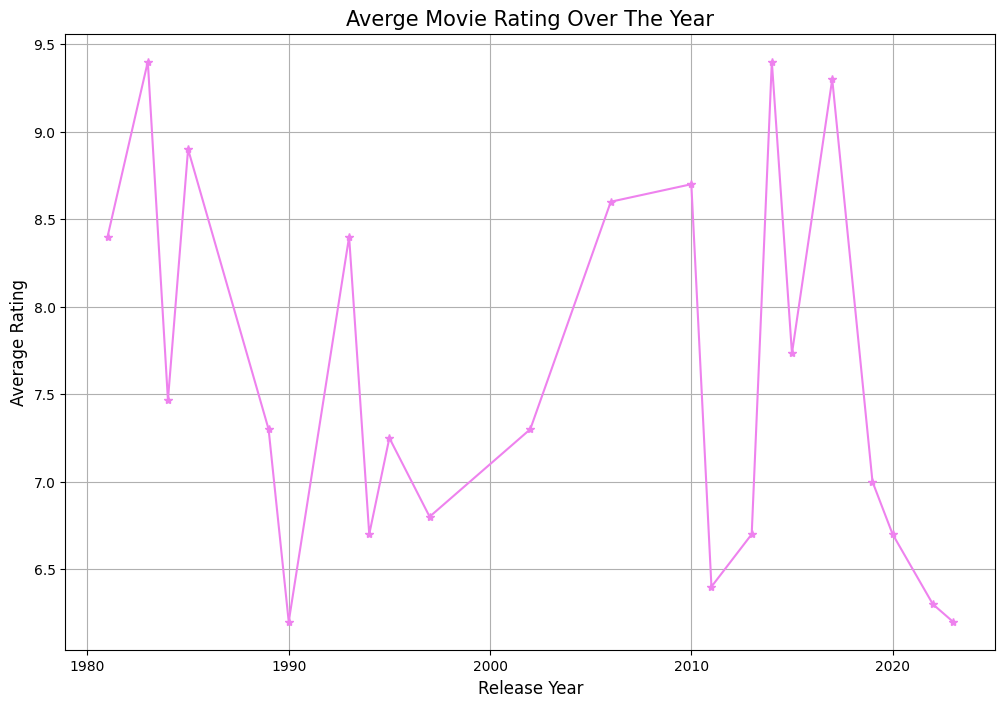

In [315]:
plt.figure(figsize=(12,8))
plt.plot(Average_Rating_Per_Year["Release Year"],Average_Rating_Per_Year["Rating"], marker="*",ls="-",c="violet")
plt.title("Averge Movie Rating Over The Year", fontsize=15)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(True)
plt.show()



#### D. Analyze the correlation between ratings and box office earnings, and discuss possible reasons for  the correlation.

In [317]:
correlation=Movie_Dataset[["Rating","Box Office Earnings (Million USD)"]].corr()
correlation

,Rating,Box Office Earnings (Million USD)
Rating,1.000000,-0.165312
Box Office Earnings (Million USD),-0.165312,1.000000


### Problem 04: “Data Detective” 


####
Solve a mystery by analyzing datasets using Pandas: 

A. Identify suspects with a suspicion level above 3. 

In [204]:
Suspicious_Dataset=pd.read_csv("suspects.csv")
Suspicious_Dataset

,suspect_id,name,suspicion_level
0,1,John Doe,5
1,2,Jane Smith,4
2,3,Emily Davis,2
3,4,Tom Brown,3
4,5,Alex Lee,6


In [206]:
Suspicious_Above_3=Suspicious_Dataset[Suspicious_Dataset["suspicion_level"]>3]
Suspicious_Above_3

,suspect_id,name,suspicion_level
0,1,John Doe,5
1,2,Jane Smith,4
4,5,Alex Lee,6


####
B. Merge the suspects and evidence DataFrames to discover connections between suspects and 
evidence. 

In [207]:
Evidence_Dataset=pd.read_csv("evidence.csv")
Evidence_Dataset

,evidence_id,description,suspect_id
0,1,Fingerprint found,1
1,2,DNA sample,2
2,3,Security footage,5
3,4,Witness testimony,1


In [211]:
Merged_Dataset=pd.merge(Suspicious_Dataset,Evidence_Dataset,on="suspect_id")
Merged_Dataset

,suspect_id,name,suspicion_level,evidence_id,description
0,1,John Doe,5,1,Fingerprint found
1,1,John Doe,5,4,Witness testimony
2,2,Jane Smith,4,2,DNA sample
3,5,Alex Lee,6,3,Security footage


####
C. Group suspects by suspicion level and count the number of suspects in each group. 


In [220]:
Grouped_Dataset=Suspicious_Dataset.groupby("suspicion_level").size().reset_index(name="count")
Grouped_Dataset

,suspicion_level,count
0,2,1
1,3,1
2,4,1
3,5,1
4,6,1


####
D. Calculate the average suspicion level among suspects. 


In [222]:
Average_Suspicious_Level=Suspicious_Dataset["suspicion_level"].mean()
Average_Suspicious_Level

np.float64(4.0)

### Problem 05: “Advanced Data Analysis with Pandas” 


####
Choose any dataset of your interest and load it into a Pandas DataFrame. Your task is to apply five 
advanced functions to extract insights and analyze the data effectively. First, use the GroupBy function 
to aggregate the data by a specific categorical column, calculating multiple statistics like the mean and 
count for relevant numerical columns. Next, create a Pivot Table to explore relationships between two 
categorical variables with corresponding numerical metrics. Merge your dataset with another related 
dataset to enhance your analysis, being mindful of any duplicates. If your dataset includes a time 
component, perform Time Series Analysis by resampling the data based on a chosen time period (e.g., daily or monthly) and calculating relevant statistics. Finally, use the apply() function to create a new 
column based on a custom function that combines or transforms existing data. Summarize your findings 
and insights derived from these analyses. 


###
A.  Load Dataset

In [224]:
Employee_Dataset=pd.read_csv("employee_dataset_cleaned.csv")
Employee_Dataset

,Employee ID,Name,Age,Gender,Department,Salary ($),Years at Company,Performance Score,Promotion Eligibility
0,EMP001,Jaclyn Martinez,60,Male,IT,97775.0,14,1,No
1,EMP002,Miranda Brown,50,Male,IT,75400.0,9,4,Yes
2,EMP003,Steven Lowe,36,Female,Marketing,44494.0,3,3,No
3,EMP004,Patricia Gross,29,Female,Finance,114691.0,21,5,Yes
4,EMP005,James Henson,42,Male,HR,83001.0,26,4,Yes
...,...,...,...,...,...,...,...,...,...
470,EMP496,Brian Proctor,42,Female,HR,119973.0,5,5,Yes
471,EMP497,Joseph Conrad,57,Male,Finance,103449.0,13,3,No
472,EMP498,Marilyn Flynn,44,Female,HR,116743.0,4,4,Yes
473,EMP499,Erin Castillo,37,Male,Marketing,100233.0,17,2,No


### 
B. GroupBy Function

In [230]:
Satictic_Dataset=Employee_Dataset.groupby("Department")["Age"].agg(["mean","count"]).reset_index()
Satictic_Dataset

,Department,mean,count
0,Finance,43.097561,82
1,HR,42.320000,100
2,IT,41.113402,97
3,Marketing,43.489583,96
4,Sales,40.800000,100


###
C. Pivot Table

In [237]:
Pivot_Table=Employee_Dataset.pivot_table(values="Age",index="Department",columns="Gender", aggfunc="sum",fill_value=0)
Pivot_Table

Gender,Female,Male
Department,,
Finance,1591,1943
HR,1989,2243
IT,2103,1885
Marketing,1998,2177
Sales,1789,2291


###
D. Merging Datasets

In [242]:
Department_Info= {"Department":["HR","Finance","Marketing","Sales","IT"],
    "Head Of Department":["Brian Proctor","Patricia Gross","Erin Castillo","Brandon David","Jaclyn Martinez"],
    "Location":["London","USA","America","Australia","England"]}
Department_Info_Dataset=pd.DataFrame(Department_Info)
Department_Info_Dataset



,Department,Head Of Department,Location
0,HR,Brian Proctor,London
1,Finance,Patricia Gross,USA
2,Marketing,Erin Castillo,America
3,Sales,Brandon David,Australia
4,IT,Jaclyn Martinez,England


In [247]:
Merged_Dataset=pd.merge(Employee_Dataset,Department_Info_Dataset,on="Department"
)
Merged_Dataset

,Employee ID,Name,Age,Gender,Department,Salary ($),Years at Company,Performance Score,Promotion Eligibility,Head Of Department,Location
0,EMP001,Jaclyn Martinez,60,Male,IT,97775.0,14,1,No,Jaclyn Martinez,England
1,EMP002,Miranda Brown,50,Male,IT,75400.0,9,4,Yes,Jaclyn Martinez,England
2,EMP003,Steven Lowe,36,Female,Marketing,44494.0,3,3,No,Erin Castillo,America
3,EMP004,Patricia Gross,29,Female,Finance,114691.0,21,5,Yes,Patricia Gross,USA
4,EMP005,James Henson,42,Male,HR,83001.0,26,4,Yes,Brian Proctor,London
...,...,...,...,...,...,...,...,...,...,...,...
470,EMP496,Brian Proctor,42,Female,HR,119973.0,5,5,Yes,Brian Proctor,London
471,EMP497,Joseph Conrad,57,Male,Finance,103449.0,13,3,No,Patricia Gross,USA
472,EMP498,Marilyn Flynn,44,Female,HR,116743.0,4,4,Yes,Brian Proctor,London
473,EMP499,Erin Castillo,37,Male,Marketing,100233.0,17,2,No,Erin Castillo,America


###
E.Time Series Analysis

In [259]:
Date=pd.date_range("20241002",periods=475)
Date

DatetimeIndex(['2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05',
               '2024-10-06', '2024-10-07', '2024-10-08', '2024-10-09',
               '2024-10-10', '2024-10-11',
               ...
               '2026-01-10', '2026-01-11', '2026-01-12', '2026-01-13',
               '2026-01-14', '2026-01-15', '2026-01-16', '2026-01-17',
               '2026-01-18', '2026-01-19'],
              dtype='datetime64[ns]', length=475, freq='D')

###
F. Use of apply() Function

In [264]:
Average_Sales_Dataset=Employee_Dataset["Salary ($)"].mean()
Average_Sales_Dataset

np.float64(80124.46)

In [265]:
Employee_Dataset["Above_Average"]=Employee_Dataset["Salary ($)"].apply(lambda x: "Yes" if x> Average_Sales_Dataset else "No")
Employee_Dataset["Above_Average"]

0      Yes
1       No
2       No
3      Yes
4      Yes
      ... 
470    Yes
471    Yes
472    Yes
473    Yes
474     No
Name: Above_Average, Length: 475, dtype: object